<center><font color= 'Black' style = 'font-family:verdana ; font-size:25px'>Melanoma Detection Assignment</font></center>
<hr style="color: black; height: 1px;">
<font color= '#067F7D' style = 'font-family:cambria ; font-size:20px'>Problem Statement </font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.</font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.
</font><br>

<b><font color=black style='font-family:Cambria; font-size:17px'>The `data set contains` the `following diseases`:</font></b><br>

- <font color="brown" style="font-family:Cambria; font-size:15px">Actinic keratosis</font><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Basal cell carcinoma</font><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Dermatofibroma</font><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Melanoma</font><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Nevus</font><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Pigmented benign keratosis</font><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Seborrheic keratosis</font><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Squamous cell carcinoma</font><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Vascular lesion</font>

<b><font color=black style='font-family:Cambria; font-size:18px'>Importing  Skin Cancer Data</font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:18px'>To do: Take necessary actions to read the data</font></b><br>

<b><font color=black style='font-family:Cambria; font-size:18px'>Importing The Necessary Libraries</font></b><br>

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [2]:
## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
for i,j,k in os.walk('C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration'):
    print(f'The folders present in the directory is {len(j)} and total images are {len(k)}')

The folders present in the directory is 2 and total images are 0
The folders present in the directory is 9 and total images are 0
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 3
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 3
The folders present in the directory is 9 and total images are 0
The folders present in the directory is 0 and total images are 114
The folders present in the directory is 0 and total images are 376
The folders present in the directory is 0 and total images are 95
The folders p

In [5]:
os.listdir('/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [6]:
image_train_data=len(list(data_dir_train.glob('*/*.jpg')))
image_test_data=len(list(data_dir_test.glob('*/*.jpg')))

print(f'THe Number of Images Present in the train data is {image_train_data}')

print(f'THe Number of Images Present in the test data is {image_test_data}')

THe Number of Images Present in the train data is 2239
THe Number of Images Present in the test data is 118


<b><font color=black style='font-family:Cambria; font-size:18px'> Load using keras.preprocessing</font></b><br>

Let's load these images off disk using the helpful image_dataset_from_directory utility.

<b><font color=black style='font-family:Cambria; font-size:18px'>Create a dataset</font></b><br>

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

<b><font color=black style='font-family:Cambria; font-size:18px'>Visualize the data</font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:18px'>Todo, create a code to visualize one instance of all the nine classes present in the dataset</font></b><br>

In [11]:

path ='C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration'

(-0.5, 1503.5, 1128.5, -0.5)

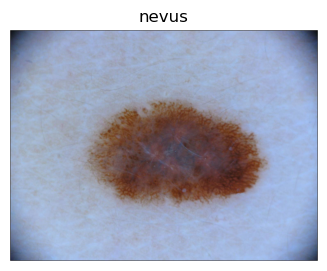

In [12]:
# visualizing the random image
import random
class_name=random.choice(os.listdir(data_dir_train))
directory='/Train'
final_path=path+directory+'/'+class_name
img=final_path + '/' + random.choice(os.listdir(final_path))
plt.figure(figsize=(4,3))

import matplotlib.image as mfimg
img=mfimg.imread(img)
plt.title(class_name)
plt.imshow(img)
plt.axis(False)

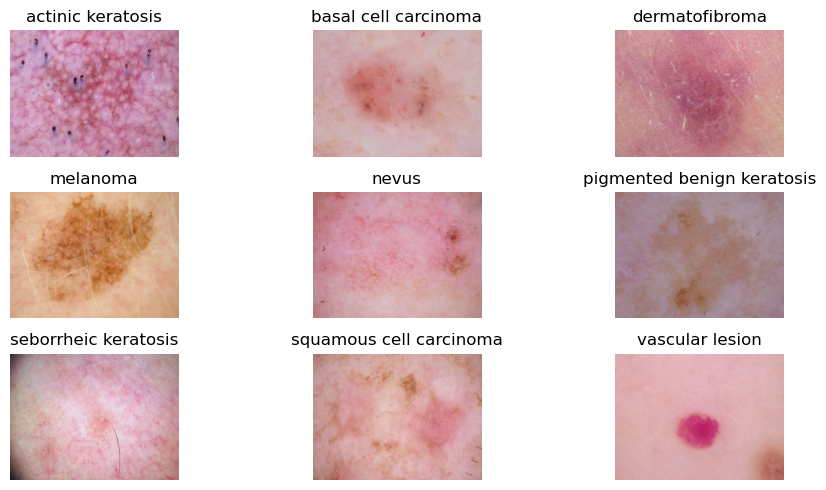

In [13]:
### your code goes here, you can use training or validation data to visualize
class_names=sorted(class_names)
image_path=data_dir_train
plt.figure(figsize=(10,5))
for i in range(9):
    
  # seect the ranom image from the class
    class_path=os.path.join(image_path,class_names[i])
    image=os.listdir(class_path)
    random_image=random.choice(image)
    random_image_path=os.path.join(class_path,random_image)
  # print(random_image_path)
  # Load and display the image
    img = plt.imread(random_image_path)

  # Plot the image on a subplot
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_names[i])
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


<b><font color=black style='font-family:Cambria; font-size:18px'>Create the model</font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'>Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use `layers.experimental.preprocessing.Rescaling` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`</font></b><br>

In [15]:
### Your code goes here
from keras.layers  import Dense,Dropout,Flatten,Conv2D,MaxPool2D
num_classes=9
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))
])
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',
                 input_shape=(180,180,32)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes,activation='Softmax'))



<b><font color=black style='font-family:Cambria; font-size:18px'>Compile the model</font></b><br>

Choose an appropirate optimiser and loss function for model training 

In [16]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        5


<b><font color=black style='font-family:Cambria; font-size:18px'>Train the model</font></b><br>

In [18]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 86s 1s/step - loss: 2.0100 - accuracy: 0.2366 - val_loss: 1.9270 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 70s 1s/step - loss: 1.8163 - accuracy: 0.3354 - val_loss: 1.6717 - val_accuracy: 0.4161
Epoch 3/20
56/56 [==============================] - 70s 1s/step - loss: 1.7189 - accuracy: 0.3778 - val_loss: 1.6789 - val_accuracy: 0.3736
Epoch 4/20
56/56 [==============================] - 70s 1s/step - loss: 1.7982 - accuracy: 0.3365 - val_loss: 1.7518 - val_accuracy: 0.3915
Epoch 5/20
56/56 [==============================] - 70s 1s/step - loss: 1.6832 - accuracy: 0.3968 - val_loss: 1.6020 - val_accuracy: 0.4161
Epoch 6/20
56/56 [==============================] - 70s 1s/step - loss: 1.6115 - accuracy: 0.4196 - val_loss: 1.5923 - val_accuracy: 0.4206
Epoch 7/20
56/56 [==============================] - 70s 1s/step - loss: 1.5767 - accuracy: 0.4325 - val_loss: 1.5214 - val_accuracy: 0.4720
Epoch 8/20
56/56 [

<b><font color=black style='font-family:Cambria; font-size:18px'>Visualizing training results</font></b><br>

In [19]:
# visualizing the results of loss curves and accuracy score of train and validation data
def plot_loss(history,figsiz):
    '''returns separate loss curves for training and validation metrics'''
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(len(history.history['loss']))

    plt.figure(figsize=(figsiz))
    plt.subplot(1,2,1)
#     plots
    plt.plot(epochs,loss,label='training loss')
    plt.plot(epochs,val_loss,label='validation loss')
    plt.title('Loss of both training and validation ')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1,2,2)
    #accuracy plot and val accuracy

    plt.plot(epochs,accuracy,label='accuracy ')
    plt.plot(epochs,val_accuracy,label='val_accuracy ')
    plt.title('accuracy of both training and validation ')
    plt.xlabel('Epochs')
    plt.legend()

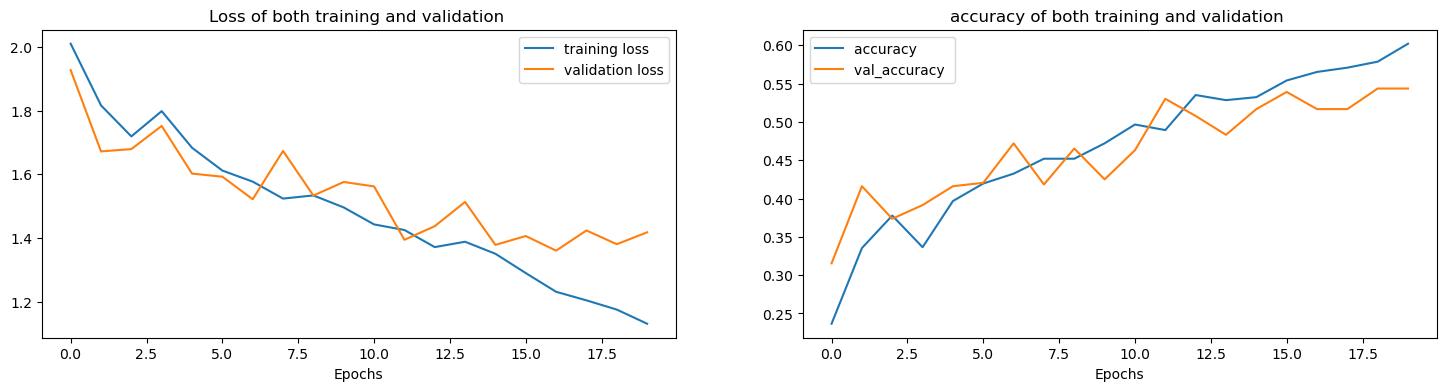

In [20]:
plot_loss(history,(18,4))

<b><font color=black style='font-family:Cambria; font-size:18px'>Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit</font></b><br>

After training the model, here's what we found:

`Training Accuracy`: As the model learned more from the training data over each training cycle (or epoch), its `accuracy improved steadily`, reaching about `63.84%` by the end. This shows that the model `got better at recognizing patterns in the training images`.

`Validation Accuracy`: At first, the model's accuracy on new, unseen data (validation set) increased too. But after a while, it seemed to hit a limit, hovering `around 52.35%`. This suggests that the`model's performance leveled off and didn't improve much further`.

`Training Loss`: The loss, which measures how well the `model's predictions match the actual labels`, `decreased consistently during training`. This indicates that the model was getting better at minimizing errors on the training data.

`Validation Loss`: Similar to validation accuracy, the `validation loss decreased initially but then seemed to stabilize or even slightly increase later on`. This implies that the model's performance on new data might not be getting better over time.

`Overfitting Signs`: Towards the `end of training, there were signs of overfitting`. While the training accuracy kept going up, the validation accuracy didn't improve much or even decreased. Also, the validation loss started to rise, suggesting that the model was having trouble generalizing to new data.

`Possible Underfitting`: Both the `training and validation accuracies remained relatively low`, which could suggest that `the model wasn't capturing the complexities of the data well enough`. This might indicate underfitting, where the model isn't sophisticated enough to understand the data patterns fully.

In [21]:
from tensorflow import keras

from keras.api._v2.keras import preprocessing,experimental
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augument=keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical',input_shape=(img_height,img_width,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2,fill_mode='reflect'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


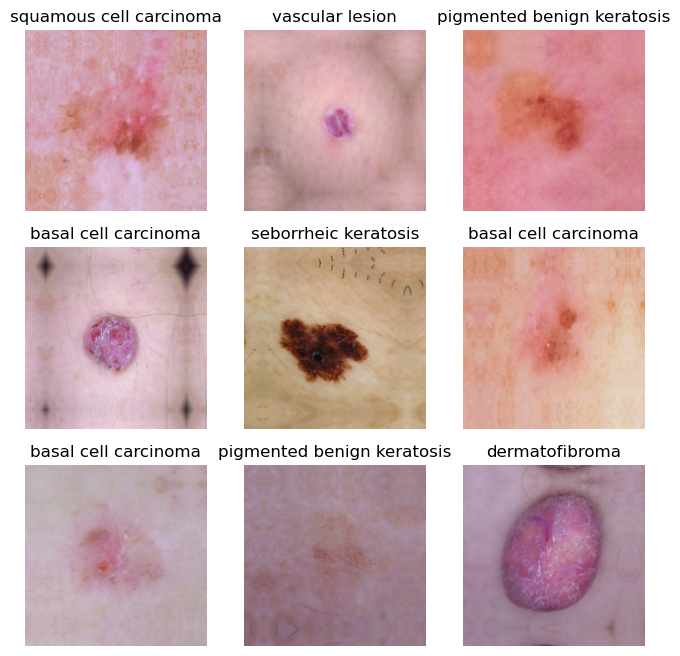

In [22]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(8,8))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(data_augument(images)[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    



<b><font color=black style='font-family:Cambria; font-size:18px'>Todo: Create the `model`, `compile and train the model`</font></b><br>

In [23]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


In [24]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [25]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 244s 4s/step - loss: 2.0197 - accuracy: 0.2199 - val_loss: 1.8924 - val_accuracy: 0.2931
Epoch 2/20
56/56 [==============================] - 238s 4s/step - loss: 1.9315 - accuracy: 0.2690 - val_loss: 1.8718 - val_accuracy: 0.2998
Epoch 3/20
56/56 [==============================] - 239s 4s/step - loss: 1.8675 - accuracy: 0.2868 - val_loss: 1.8552 - val_accuracy: 0.3311
Epoch 4/20
56/56 [==============================] - 239s 4s/step - loss: 1.8229 - accuracy: 0.3209 - val_loss: 1.7100 - val_accuracy: 0.3602
Epoch 5/20
56/56 [==============================] - 238s 4s/step - loss: 1.7202 - accuracy: 0.3689 - val_loss: 1.6687 - val_accuracy: 0.4295
Epoch 6/20
56/56 [==============================] - 242s 4s/step - loss: 1.6737 - accuracy: 0.3979 - val_loss: 1.6288 - val_accuracy: 0.4183
Epoch 7/20
56/56 [==============================] - 237s 4s/step - loss: 1.6660 - accuracy: 0.3962 - val_loss: 1.7681 - val_accuracy: 0.3915
Epoch 8/20
56


<b><font color=black style='font-family:Cambria; font-size:18px'>Visualizing the results</font></b><br>

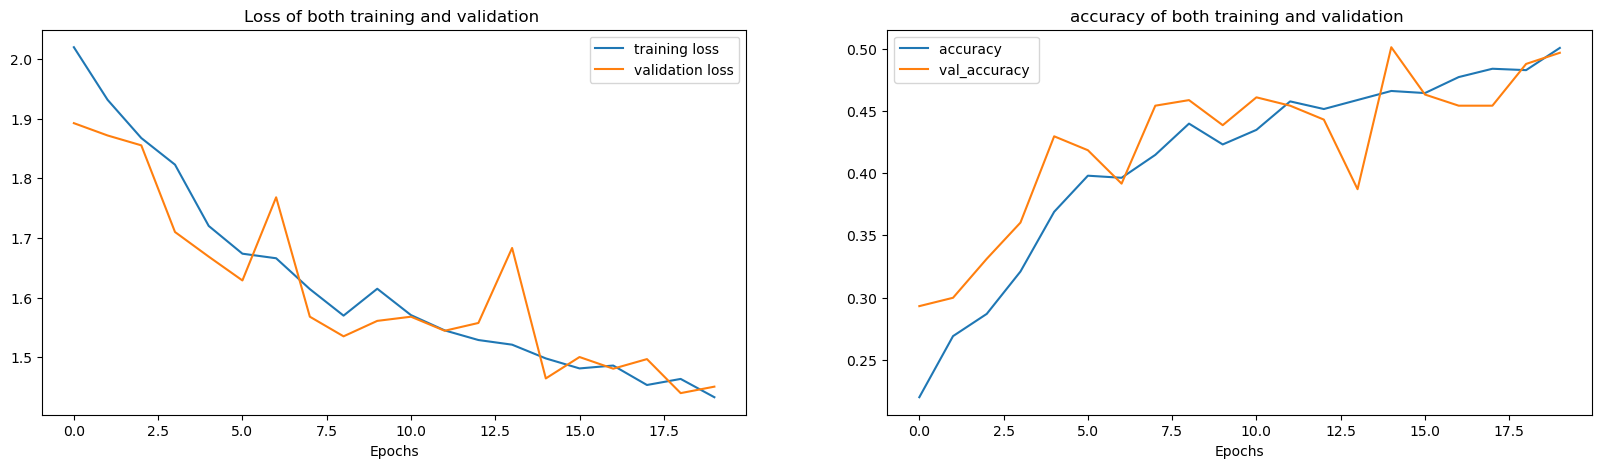

In [26]:
plot_loss(history,(20,5))

<b><font color=black style='font-family:Cambria; font-size:18px'>Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?</font></b><br>


After fitting the new model, here are the findings:

`Training Accuracy` : The training accuracy starts at a relatively low value (around 21.48%) and gradually increases over epochs, reaching approximately 52.40% by the end of training. This suggests that the model is learning from the training data and improving its ability to classify images within the training set.

`Validation Accuracy`: The validation accuracy follows a similar trend to the training accuracy, starting low and increasing over epochs. However, it appears to plateau around 51.68% towards the later epochs. This indicates that the model's performance on unseen data (validation set) is not improving significantly beyond a certain point.

`Training Loss` : The training loss consistently decreases over epochs, indicating that the model is optimizing its parameters to better fit the training data.

`Validation Loss`: The validation loss initially decreases but then stabilizes or slightly increases towards the later epochs. This suggests that the model's ability to generalize to unseen data may be limited, as evidenced by the lack of improvement in validation accuracy.

Overall, while there are signs of improvement compared to the previous model run, with both training and validation accuracies showing an upward trend, the model's performance remains relatively low. There is no clear evidence of overfitting, as the training and validation accuracies are comparable, but the model's inability to achieve higher accuracies indicates potential underfitting. 


<b><font color=black style='font-family:Cambria; font-size:18px'>`Todo` : Find the distribution of classes in the training dataset.
</font></b><br>

<b><font color=black style='font-family:Cambria; font-size:18px'>`context`:Many times `real life datasets` can have `class imbalance`, `one class can have proportionately higher number of samples compared to the others`. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data</font></b><br>

In [27]:

path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df


,Path,Label
0,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
1,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
2,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
3,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
4,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
...,...,...
2234,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,vascular lesion
2235,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,vascular lesion
2236,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,vascular lesion
2237,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,vascular lesion


In [28]:
original_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [29]:
label_counts = original_df['Label'].value_counts()
label_counts

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

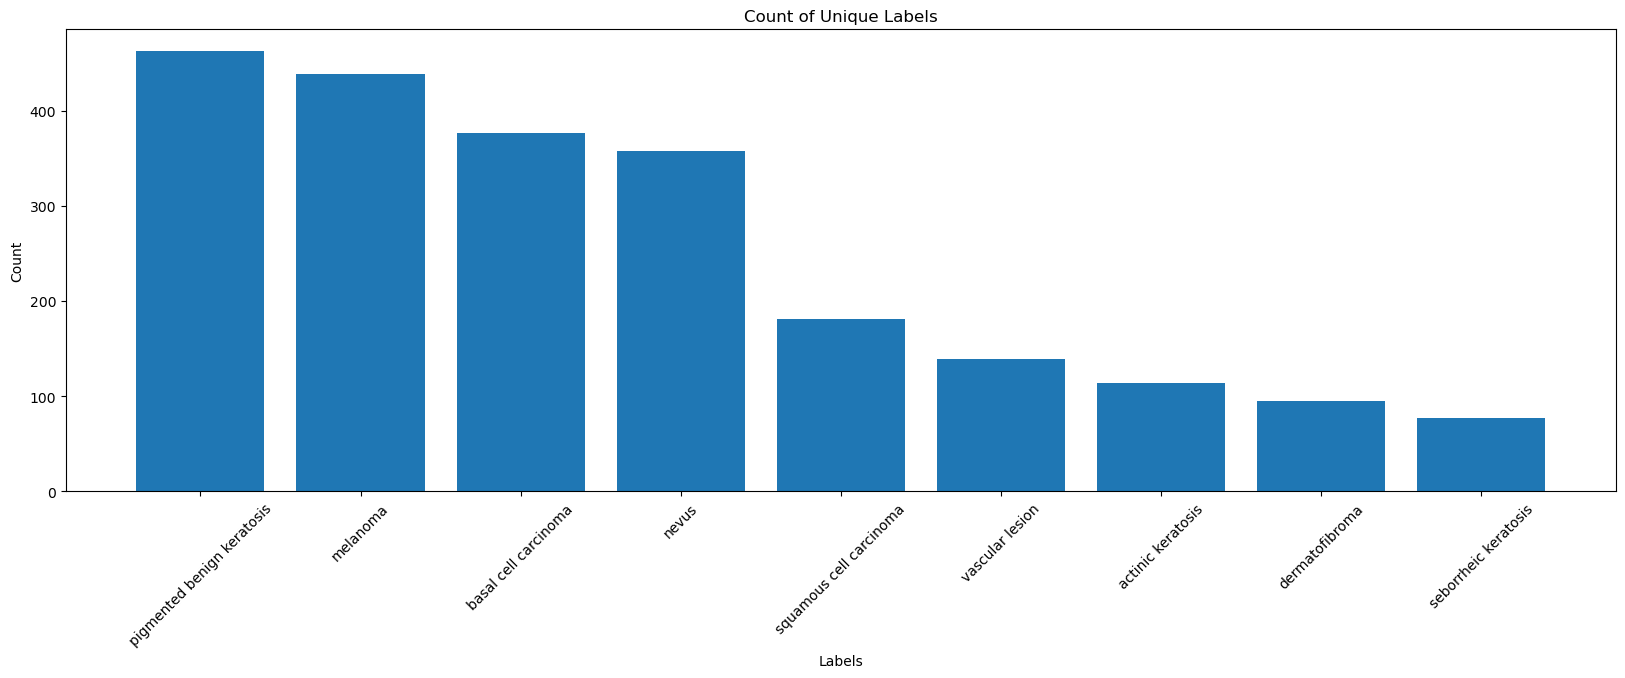

In [30]:
# Plotting the count of unique labels
plt.figure(figsize=(20, 6))
plt.bar(label_counts.index, label_counts.values)
plt.title('Count of Unique Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability if necessary
plt.show()

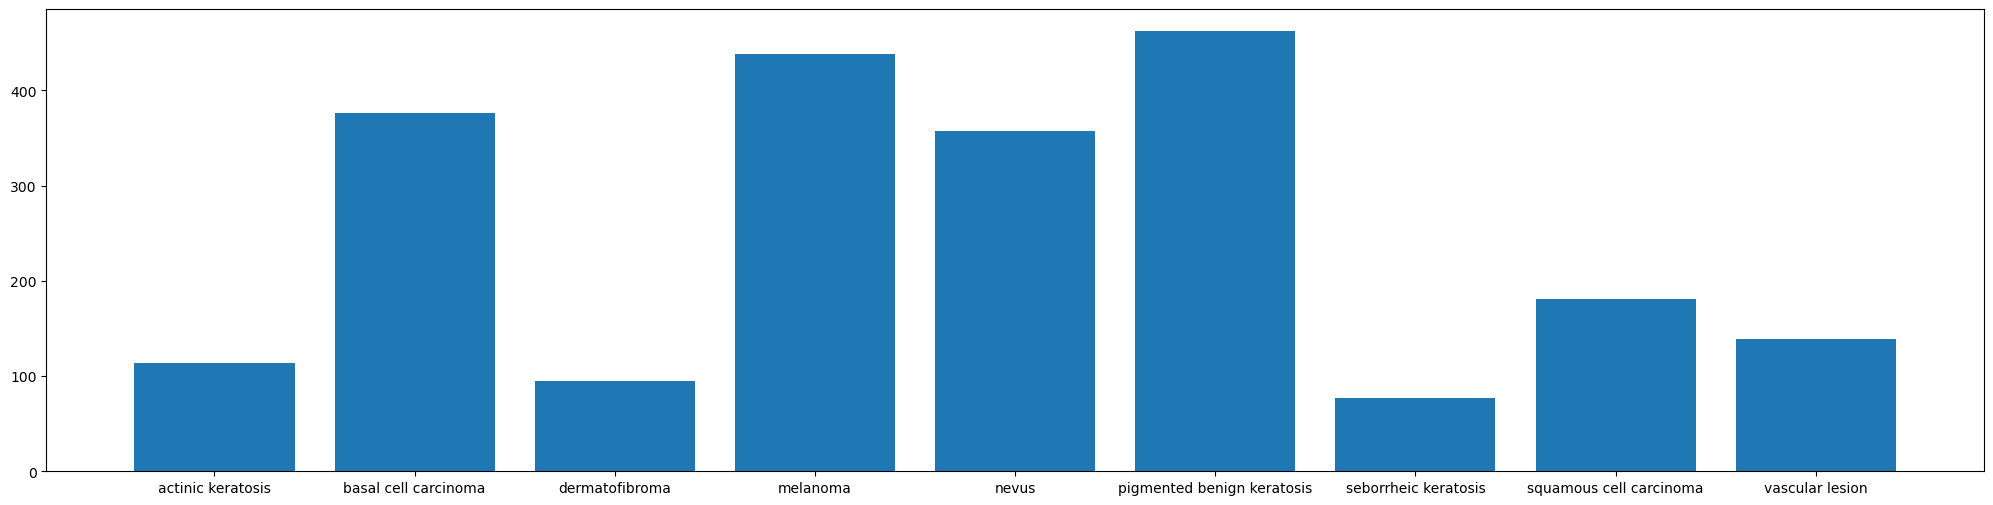

In [36]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,6))

plt.bar(class_names,count)
plt.show()

<b><font color=black style='font-family:Cambria; font-size:18px'>`Todo` : Write your findings here:</font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:18px'>`Todo` : Which class has the least number of samples?
</font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:18px'>`Todo`  Which classes dominate the data in terms proportionate number of samples?</font></b><br>

### Findings:
<font color=brown style='font-family:Cambria; font-size:18px'>The class `"Seborrheic Keratosis"` has the `least number of samples, with only 77 samples`.
</font>
<br>

<font color=brown style='font-family:Cambria; font-size:18px'>The classes `"Pigmented Benign Keratosis" and "Melanoma"` dominate the data in terms of proportionate number of samples, with `462 and 438 samples respectively`. These classes have a significantly higher number of samples compared to other classes in the dataset.
</font><br>



In [37]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

<b><font color=black style='font-family:Cambria; font-size:18px'>`Todo` : Rectify the class imbalance</font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:18px'>`context` : You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.</font></b>
<br>

In [38]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [39]:
# path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17D4432A8D0>: 100%|█| 500/500 [00:19<00:00, 25.03 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17D48D01450>: 100%|█| 500/500 [00:16<00:00, 29.60 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17CBD78C7D0>: 100%|█| 500/500 [00:19<00:00, 25.45 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17D48DAAED0>: 100%|█| 500/500 [00:15<00:00, 32.67 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17CBB431A50>: 100%|█| 500/500 [00:17<00:00, 29.19 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x17CBCD54750>: 100%|█| 500/500 [00:17<00:00, 28.47 Samples


Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17CBA994350>: 100%|█| 500/500 [00:18<00:00, 27.10 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x17CBB017D50>: 100%|█| 500/500 [00:18<00:


Initialised with 2239 image(s) found.
Output directory set to C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17CBB06AED0>: 100%|█| 500/500 [00:19<00:00, 25.09 Samples/


<font color=black style='font-family:Cambria; font-size:18px'>`Augmentor` has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.
</font>
<br>

In [40]:
data_dir_train1=pathlib.Path('C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


<font color=black style='font-family:Cambria; font-size:18px'>Lets see the distribution of `augmented data after adding new images to the original training data`.
</font>
<br>

In [41]:
##
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
1,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
2,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
3,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
4,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,actinic keratosis
...,...,...
6734,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,vascular lesion
6735,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,vascular lesion
6736,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,vascular lesion
6737,C:\Users\zebaf\Downloads\CNN_assignment\Skin c...,vascular lesion


Lets see the distribution of augmented data after adding new images to the original training data.

In [42]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1427
melanoma                      1264
basal cell carcinoma          1127
nevus                         1063
squamous cell carcinoma        532
vascular lesion                432
actinic keratosis              361
dermatofibroma                 293
seborrheic keratosis           240
Name: count, dtype: int64

So, now we have `added 500 images to all the classes to maintain some class balance`. We can add more images as we want to improve training process.

 <b><font color=black style='font-family:Cambria; font-size:18px'>`Todo`Train the model on the data created using Augmentor
</font></b>
<br>

In [43]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [44]:
data_dir_train="C:/Users/zebaf/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [46]:
## your code goes here

model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))
])

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(180,180,32)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [47]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [48]:
len(train_ds),int(0.1* len(train_ds))

(169, 16)

In [49]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
    train_ds.repeat(),
    steps_per_epoch=int(0.1* len(train_ds)),
    validation_data=val_ds,
    validation_steps=int(0.1*len(val_ds)),
    epochs=epochs
)

Epoch 1/30
16/16 [==============================] - 72s 4s/step - loss: 2.1477 - accuracy: 0.5234 - val_loss: 2.0712 - val_accuracy: 0.6406
Epoch 2/30
16/16 [==============================] - 67s 4s/step - loss: 2.0633 - accuracy: 0.6836 - val_loss: 2.0569 - val_accuracy: 0.6328
Epoch 3/30
16/16 [==============================] - 67s 4s/step - loss: 2.0289 - accuracy: 0.6836 - val_loss: 2.0390 - val_accuracy: 0.6328
Epoch 4/30
16/16 [==============================] - 67s 4s/step - loss: 2.0021 - accuracy: 0.6680 - val_loss: 1.9700 - val_accuracy: 0.6719
Epoch 5/30
16/16 [==============================] - 71s 4s/step - loss: 1.9557 - accuracy: 0.7031 - val_loss: 1.9596 - val_accuracy: 0.6641
Epoch 6/30
16/16 [==============================] - 69s 4s/step - loss: 1.9562 - accuracy: 0.6562 - val_loss: 1.9474 - val_accuracy: 0.6328
Epoch 7/30
16/16 [==============================] - 50s 3s/step - loss: 1.9303 - accuracy: 0.6406 - val_loss: 1.9726 - val_accuracy: 0.5781
Epoch 8/30
16/16 [==

In [50]:
# evalauting the whole model
model.evaluate(val_ds)

43/43 [==============================] - 52s 1s/step - loss: 1.4801 - accuracy: 0.6726


[1.4801397323608398, 0.6726058125495911]

#### **Todo:**  Visualize the model results

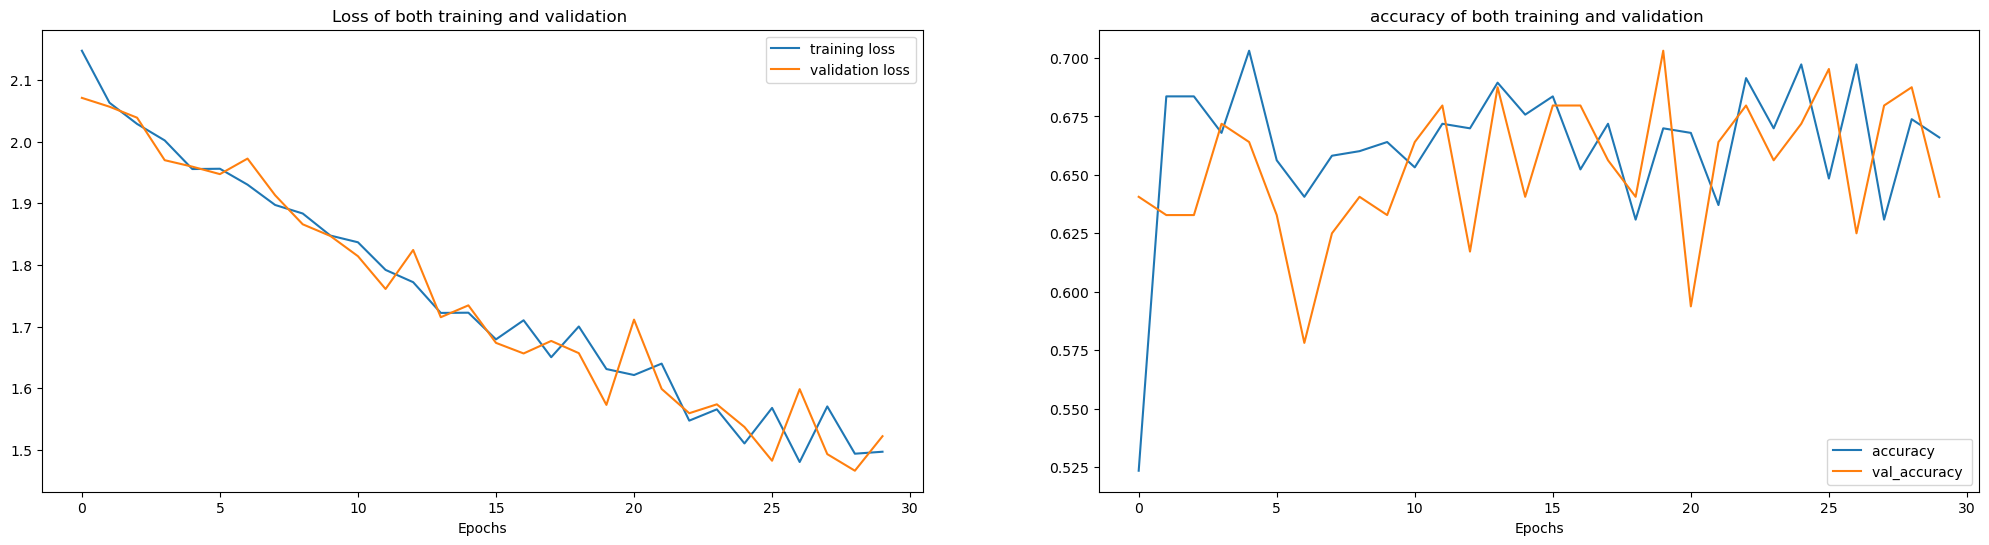

In [51]:
plot_loss(history,(25,6))


<b><font color=black style='font-family:Cambria; font-size:18px'>`Todo` :Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?</font><b>
<br>

- `Model Performance`: The model achieved an `accuracy of approximately 67.26%` on the validation dataset after training for 30 epochs. This accuracy indicates that the model can classify images with moderate success but might still have room for improvement.
<br>
    
- `Underfitting/Overfitting`: The `accuracy on the validation dataset is lower than` desired, suggesting that `the model may still be underfitting`. However, there is `no clear evidence of overfitting` as the `training and validation accuracies are relatively close throughout the training process`. To further diagnose underfitting or overfitting, additional analysis such as examining the learning curves (training loss vs. validation loss/accuracy) could provide more insights.
<br>
    
- `Impact of Class Rebalance`: Introducing class rebalancing by augmenting the dataset with additional samples for classes with fewer samples might have helped improve the model's performance to some extent. However, the impact of class rebalance on the model's overall performance needs to be evaluated more comprehensively, potentially by comparing the performance metrics before and after class rebalancing.
<br>
    
- In conclusion, while the class rebalancing strategy may have contributed to some improvement in model performance, further analysis and optimization may be needed to address any remaining issues of underfitting and to potentially enhance the model's accuracy on the validation dataset.


